In [1]:
import os

# 현재 작업 디렉토리 출력
print(os.getcwd())

# 작업 디렉토리 변경, 작업자 환경에 맞게 경로 수정
os.chdir('./melon')

# 변경된 디렉토리 확인
print(os.getcwd())

/home/ghpf/Yoon/2023 sep. 비SCI/Computer vision/Data
/home/ghpf/Yoon/2023 sep. 비SCI/Computer vision/Data/melon


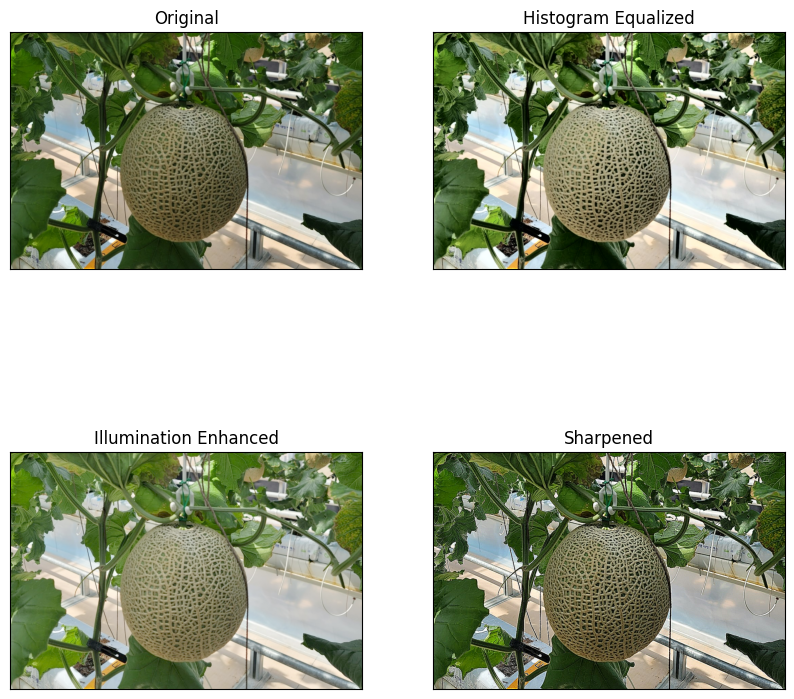

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# 이미지 불러오기
img_path = './melon_enhancement.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 원본 이미지에서 조명 보강하기
img_illuminated = adjust_gamma(img, 1.5)

# 원본 이미지에서 히스토그램 평탄화하기
yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])
img_eq = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)

# 원본 이미지에서 샤프닝하기
kernel = np.array([[0, -2, 0], 
                   [-2, 9, -2], 
                   [0, -2, 0]])

img_sharp = cv2.filter2D(img, -1, kernel)

# 결과 이미지 보여주기
fig, axs = plt.subplots(2, 2, figsize=(10,10))  # 2x2 그리드로 변경

axs[0, 0].imshow(img)
axs[0, 0].set_title('Original')
axs[0, 0].set_xticks([])  # x축 tick 제거
axs[0, 0].set_yticks([])  # y축 tick 제거

axs[0, 1].imshow(img_eq)
axs[0, 1].set_title('Histogram Equalized')
axs[0, 1].set_xticks([])  # x축 tick 제거
axs[0, 1].set_yticks([])  # y축 tick 제거

axs[1, 0].imshow(img_illuminated)
axs[1, 0].set_title('Illumination Enhanced')
axs[1, 0].set_xticks([])  # x축 tick 제거
axs[1, 0].set_yticks([])  # y축 tick 제거

axs[1, 1].imshow(img_sharp)
axs[1, 1].set_title('Sharpened')
axs[1, 1].set_xticks([])  # x축 tick 제거
axs[1, 1].set_yticks([])  # y축 tick 제거
for ax in axs.flat:
    ax.label_outer()
plt.savefig("melon_enhancement_result.png", bbox_inches = 'tight', dpi=300)
plt.show()

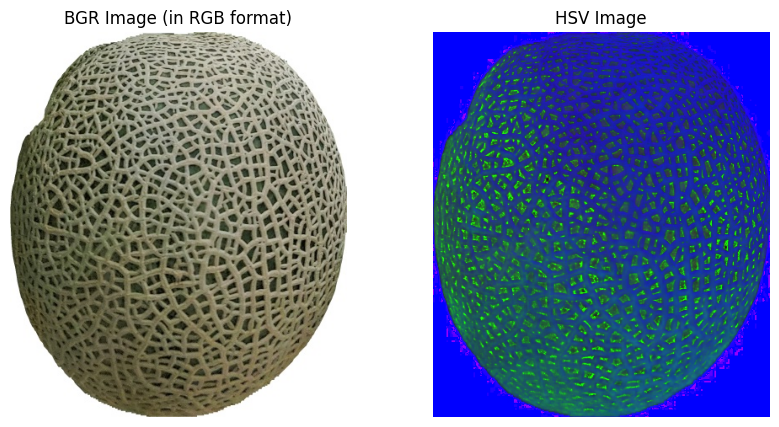

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
img_path = './melon_1.jpg'
image_bgr = cv2.imread(img_path)

# BRG 데이터를 RGB 속성으로 전환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# BGR 데이터를 HSV 컬러 스페이스로 전환
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# 이미지 보여주기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(image_rgb)
ax1.set_title("BGR Image (in RGB format)")
ax1.axis("off")

ax2.imshow(image_hsv)
ax2.set_title("HSV Image")
ax2.axis("off")

#저장
cv2.imwrite('melon_hsv_1.jpg', image_hsv)
plt.show()

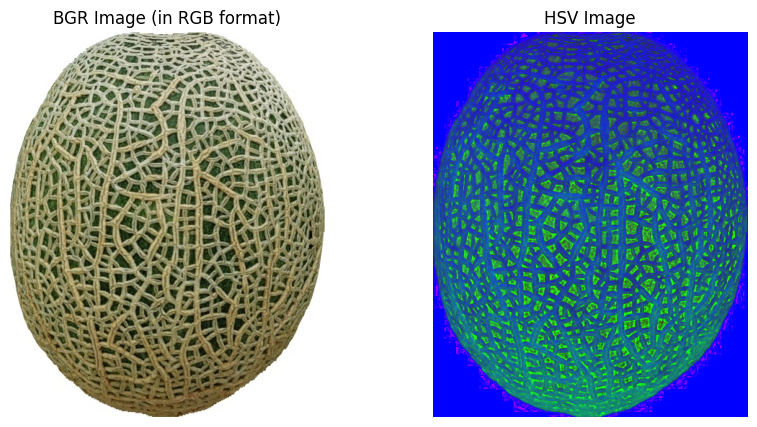

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
img_path = './melon_2.jpg'
image_bgr = cv2.imread(img_path)

# BRG 데이터를 RGB 속성으로 전환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# BGR 데이터를 HSV 컬러 스페이스로 전환
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# 이미지 보여주기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(image_rgb)
ax1.set_title("BGR Image (in RGB format)")
ax1.axis("off")

ax2.imshow(image_hsv)
ax2.set_title("HSV Image")
ax2.axis("off")

#저장
cv2.imwrite('melon_hsv_2.jpg', image_hsv)
plt.show()

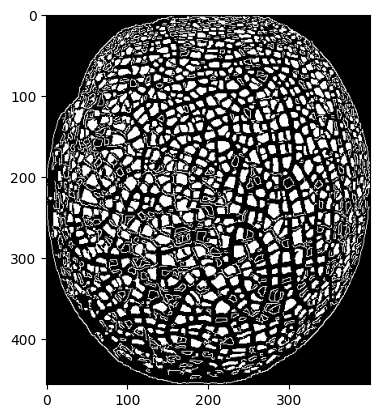

In [37]:
import cv2
import numpy as np

# 이미지 로드
img = cv2.imread('./melon_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 멜론의 윤곽을 찾기 위해 엣지 검출 적용
edges = cv2.Canny(gray, 50, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 원본 이미지와 동일한 크기의 검은색 이미지 생성
mask = np.zeros_like(img)

# 마스크 위에 흰색으로 윤곽 그림
cv2.fillPoly(mask, contours, color=(255, 255, 255))

# 그레이스케일로 전환
gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# 결과 이미지 출력 및 저장
cv2.imwrite('melon_binary_1.jpg', gray_mask)
plt.imshow(gray_mask, cmap='gray')
plt.show()

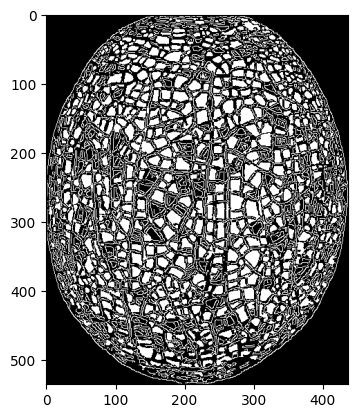

In [38]:
import cv2
import numpy as np

# 이미지 로드
img = cv2.imread('./melon_2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 멜론의 윤곽을 찾기 위해 엣지 검출 적용
edges = cv2.Canny(gray, 50, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 원본 이미지와 동일한 크기의 검은색 이미지 생성
mask = np.zeros_like(img)

# 마스크 위에 흰색으로 윤곽 그림
cv2.fillPoly(mask, contours, color=(255, 255, 255))

# 그레이스케일로 전환
gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# 결과 이미지 출력 및 저장
cv2.imwrite('melon_binary_2.jpg', gray_mask)
plt.imshow(gray_mask, cmap='gray')
plt.show()

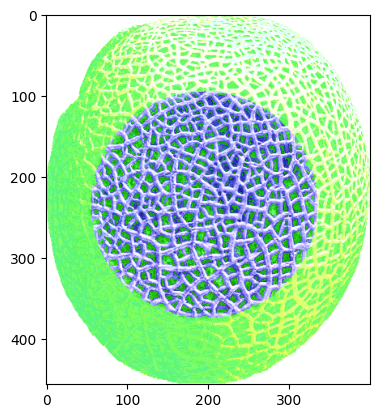

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드 및 컬러 변환
img = cv2.imread('./melon_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 원형 ROI 정의
center = (195, 235)
radius = 140
mask = np.zeros_like(img)
cv2.circle(mask, center, radius, (255, 255, 255), -1)
roi = cv2.bitwise_and(img, mask)

# LAB 컬러 공간으로 ROI 변환 및 CLAHE 적용
lab_roi = cv2.cvtColor(roi, cv2.COLOR_RGB2LAB)
l_channel, a_channel, b_channel = cv2.split(lab_roi)
clahe = cv2.createCLAHE(clipLimit=100.0, tileGridSize=(40, 40))
l_channel_clahe = clahe.apply(l_channel)
lab_roi_clahe = cv2.merge([l_channel_clahe, a_channel, b_channel])
roi_clahe = cv2.cvtColor(lab_roi_clahe, cv2.COLOR_LAB2RGB)

# 원본 ROI 대신 CLAHE-enhanced ROI 사용
img = cv2.bitwise_and(img, cv2.bitwise_not(mask))
img = cv2.bitwise_or(img, roi_clahe)

# k-means 알고리즘으로 ROI 내에서 두 가지 주요 색상 추출
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
pixel_vals = lab_roi.reshape((-1, 3)).astype(np.float32)
K = 2
_, labels, centers = cv2.kmeans(pixel_vals, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
dominant_colors = centers[labels.flatten()].reshape(roi.shape)

# 주요 색상 라벨링
colors = [(0, 0, 255), (0, 255, 0)]
labeled_img = np.zeros_like(img)
for i in range(K):
    mask = cv2.inRange(dominant_colors, centers[i], centers[i])
    labeled_img[mask == 255] = colors[i]

# 결과 표시 및 저장
overlay = cv2.addWeighted(img, 1, labeled_img, 0.6, 0)
plt.imshow(overlay)
plt.show()
overlay_BGR = cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR)
#cv2.imwrite('melon_colormapped_result2.jpg', overlay_BGR)


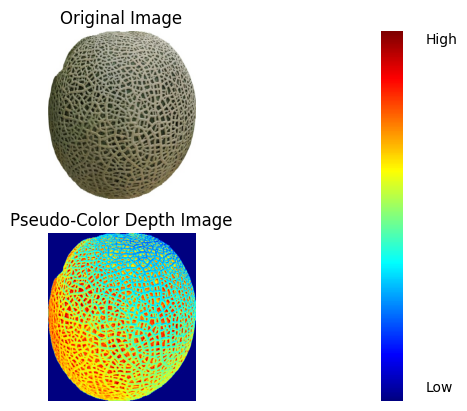

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = './melon_1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Create a pseudo-color depth image
pseudo_color_depth = cv2.applyColorMap(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.COLORMAP_JET)

# Create a scale bar with COLORMAP_JET
scale_bar_height = 170
scale_bar_width = 10
gray_scale_bar = np.linspace(0, 255, scale_bar_height).astype(np.uint8)
gray_scale_bar = np.tile(gray_scale_bar.reshape(scale_bar_height, 1), (1, scale_bar_width))
jet_scale_bar = cv2.applyColorMap(gray_scale_bar, cv2.COLORMAP_JET)

# Display the images and scale bar
plt.figure()

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(pseudo_color_depth)
plt.title('Pseudo-Color Depth Image')
plt.axis('off')

scale_bar_ax = plt.subplot(1, 2, 2)
plt.imshow(jet_scale_bar)
plt.title('Scale Bar')
plt.axis('off')

# Add "High" and "Low" text to the scale bar
scale_bar_ax.text(20, 5, 'High', fontsize=10, color='black')
scale_bar_ax.text(20, scale_bar_height - 5, 'Low', fontsize=10, color='black')

# 이미지 저장
overlay_BGR = cv2.cvtColor(pseudo_color_depth, cv2.COLOR_RGB2BGR)
cv2.imwrite('melon_depth_result_1.jpg', overlay_BGR)
plt.show()



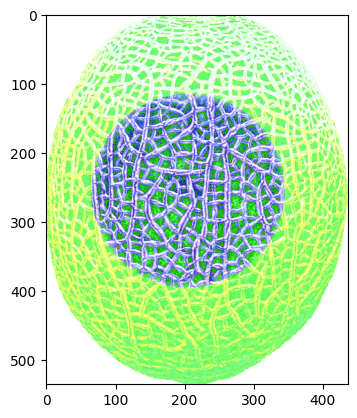

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드 및 컬러 변환
img = cv2.imread('./melon_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 원형 ROI 정의
center = (205, 255)
radius = 140
mask = np.zeros_like(img)
cv2.circle(mask, center, radius, (255, 255, 255), -1)
roi = cv2.bitwise_and(img, mask)

# LAB 컬러 공간으로 ROI 변환 및 CLAHE 적용
lab_roi = cv2.cvtColor(roi, cv2.COLOR_RGB2LAB)
l_channel, a_channel, b_channel = cv2.split(lab_roi)
clahe = cv2.createCLAHE(clipLimit=100.0, tileGridSize=(40, 40))
l_channel_clahe = clahe.apply(l_channel)
lab_roi_clahe = cv2.merge([l_channel_clahe, a_channel, b_channel])
roi_clahe = cv2.cvtColor(lab_roi_clahe, cv2.COLOR_LAB2RGB)

# 원본 ROI 대신 CLAHE-enhanced ROI 사용
img = cv2.bitwise_and(img, cv2.bitwise_not(mask))
img = cv2.bitwise_or(img, roi_clahe)

# k-means 알고리즘으로 ROI 내에서 두 가지 주요 색상 추출
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
pixel_vals = lab_roi.reshape((-1, 3)).astype(np.float32)
K = 2
_, labels, centers = cv2.kmeans(pixel_vals, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
dominant_colors = centers[labels.flatten()].reshape(roi.shape)

# 주요 색상 라벨링
colors = [(0, 0, 255), (0, 255, 0)]
labeled_img = np.zeros_like(img)
for i in range(K):
    mask = cv2.inRange(dominant_colors, centers[i], centers[i])
    labeled_img[mask == 255] = colors[i]

# 결과 표시 및 저장
overlay = cv2.addWeighted(img, 1, labeled_img, 0.6, 0)
plt.imshow(overlay)
plt.show()
overlay_BGR = cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR)
#cv2.imwrite('melon_colormapped_result2.jpg', overlay_BGR)


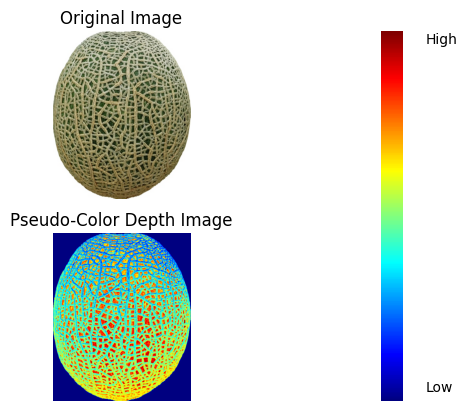

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = './melon_2.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#깊이 이미지 생성
pseudo_color_depth = cv2.applyColorMap(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.COLORMAP_JET)

# Create a scale bar with COLORMAP_JET
scale_bar_height = 170
scale_bar_width = 10
gray_scale_bar = np.linspace(0, 255, scale_bar_height).astype(np.uint8)
gray_scale_bar = np.tile(gray_scale_bar.reshape(scale_bar_height, 1), (1, scale_bar_width))
jet_scale_bar = cv2.applyColorMap(gray_scale_bar, cv2.COLORMAP_JET)

# Display the images and scale bar
plt.figure()

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(pseudo_color_depth)
plt.title('Pseudo-Color Depth Image')
plt.axis('off')

scale_bar_ax = plt.subplot(1, 2, 2)
plt.imshow(jet_scale_bar)
#plt.title('Scale Bar')
plt.axis('off')

# Add "High" and "Low" text to the scale bar
scale_bar_ax.text(20, 5, 'High', fontsize=10, color='black')
scale_bar_ax.text(20, scale_bar_height - 5, 'Low', fontsize=10, color='black')

# 이미지 저장
overlay_BGR = cv2.cvtColor(pseudo_color_depth, cv2.COLOR_RGB2BGR)
#cv2.imwrite('melon_depth_result_2.jpg', overlay_BGR)

plt.show()

